# Replication Baskaran & Hessami (2018)

**Disclaimer: This replication is work in progress, tentative and incomplete.**

This notebook contains a replication of Baskaran, T., & Hessami, Z. (2018) Does the Election of a Female Leader Clear the Way for More Women in Politics? *American Economic Journal: Economic Policy*, 10(3): 91-121.

For this purpose, first, data and method used as well as the key results are summarized briefly. Second, descriptive and graphical analyses are presented in preparation of third, a replication of the key results of the paper which is accompanied by critical review of the results presented.

## 1. Excecutive summary of the paper
* **Observation:** *Anti-female voter bias* results in **underrepresentation of females in politics**.


* **Research Hypothesis:** Exposure to a female mayor deminishes *anti-female biases* of voters.


* **Identification problems:**

    * Other potential drivers of this observation:
        - Political parties influence election outcomes. Thus, underrepresentation might be caused by *anti-female party biases*
        - Parties might anticipate *anti-female voter bias* and, therefore, are less willing to field female candidates in competitive races.
        - Women who expect discrimination might be reluctand to run for election/ pursue a career in politics in the first place. 

    * Isolating *anti-female voter bias*: Rule out alternative explanations
        - (a) Initial ranks of candidates does not impact their rank advancements
        - (b) Characteristics of women on party's list chage only little in case there is a female mayor in office
        - (c) Number of female candidates on list remains unchanged
        - (a), (b), and (c) indicate little *anti-female party bias*
        

* **Data:**

    * Data on local council election in the German state of Hesse.
        - Open-list electoral system (parties specify order of candidates, voters can preferential votes to individual candidates).
        - Includes gender, list ranks, personal characteristics among other information for ~109.017 candidates who competed in 2001, 2006, 2011, or 2016 elections
    
    * Data on mayor elections for all 426 municipalities in Hesse, including the elected mayor's gender and the margin the election was won by.
    
    
* **Method:**

    * Authors use a regression discontinuity design (RDD) to study the causal effects of female mayors on subsequent council election results.
    
    * The discontinuity is provided by close mixed-gender mayoral elections.
    
    * estimated model equation: 
     > $rank \, improvement_{k, i, t} = \alpha + \beta female \, mayor_{i, t} + f(vote \, margin)_{i, t} + female \, mayor_{i, t} \times  g(vote \, margin)_{i, t} + \epsilon_{k, i, t}$
     
     Where 
         - $rank \, improvement_{k, i, t}$ is the normalized rank improvement of candidate $k$ in municipality $i$ and local election year $t$.
         - $vote \, margin_{i, t}$ is the margin of victory of the female candidate in the preceeding mayoral election (negative values, thus, denote a loss of the female candidate).
         - $female \, mayor_{i, t}$ is a dummy that takes value 1 if a female candiate has won the mayoral election preceeding the council election $(female \, mayor_{i, t} = 1,$ *iff* $vote \, margin_{i, t} > 0)$.
         
     **TODO:** This is probably the appropriate place for the causal graph representing the model.


* **Results:**
    * A female candidate winning a close mixed-gender mayoral election causes...
        
        - voters to give preferential votes to female council candidates.
    
        - a 4 percentage points higher share of female council members.
        
        - positive spillover effects on female council candidates in neighboring municipalities.
       

## 2. Descriptive and Graphical Analyses
Import the main dataset as it is provided by the authors.

In [2]:
# Import packages needed for subsequent analyses
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
from auxiliary.auxiliary import *

# Import main dataset and print first ten rows
df_main_dataset = pd.DataFrame(data = pd.read_stata("data\main_dataset.dta"))
df_main_dataset.head(10)


,gkz,jahr,gkz_jahr,rdd_sample,female,elected,gewinn_norm,gewinn,gewinn_dummy,listenplatz_norm,joint_party,age,non_university_phd,university,phd,architect,businessmanwoman,engineer,lawyer,civil_administration,teacher,employed,selfemployed,student,retired,housewifehusband,incumbent_council,wahlbet,party,female_mayor,margin_1,inter_1,margin_2,inter_2,female_mayor_full_sample,sum_years_as_mayor,mayor_age,mayor_university,mayor_employment,log_bevoelkerung,log_flaeche,log_debt_pc,log_tottaxrev_pc,log_gemeinde_beschaef_pc,log_female_sh_gem_besch,log_tot_beschaeft_pc,log_female_share_totbesch,log_prod_share_tot,log_female_share_prod
0,411000,2001.0,4110002001,NaN,0.0,1.0,1.408451,1.0,1.0,4.225352,0.0,58.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
1,411000,2001.0,4110002001,NaN,0.0,0.0,2.816901,2.0,1.0,12.676056,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,os,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
2,411000,2001.0,4110002001,NaN,0.0,0.0,-8.450705,-6.0,0.0,36.619717,0.0,39.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
3,411000,2001.0,4110002001,NaN,0.0,0.0,-4.225352,-3.0,0.0,25.352112,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
4,411000,2001.0,4110002001,NaN,0.0,0.0,1.408451,1.0,1.0,29.577465,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,uffbasse,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
5,411000,2001.0,4110002001,NaN,0.0,1.0,0.000000,0.0,0.0,1.408451,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
6,411000,2001.0,4110002001,NaN,0.0,0.0,1.408451,1.0,1.0,8.450705,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,pds-dkp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
7,411000,2001.0,4110002001,NaN,0.0,0.0,-8.450705,-6.0,0.0,36.619717,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,os,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
8,411000,2001.0,4110002001,NaN,1.0,1.0,0.000000,0.0,0.0,1.408451,0.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
9,411000,2001.0,4110002001,NaN,0.0,0.0,15.492958,11.0,1.0,57.746479,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217


In a first step, in order to get a better understanding of the data provided, the relationship of the margin of victory of the female mayor (abscissa) and the rank improvements of female candidates in the subsequent council election (ordinate) is illustrated (see firgure 1). For this exercise, only data on council elections that subceeded mixed gender mayor elections will be used (mayor elections in which two top candidates were of opposite gender). In addition, only rank improvements of female council candidates are of interest for this analysis and are, therefore, included in the illustration below. 

Note that for easier interpretability *rank improvements* in the council elections are provided in a normalized form, facilitating comparability of changes in ranks of candidates between councils of different sizes. This conversion follows the equation: 

$ rank \, improvement = (\frac{initial \, rank - final \, rank}{council \, size}) \times 100. $



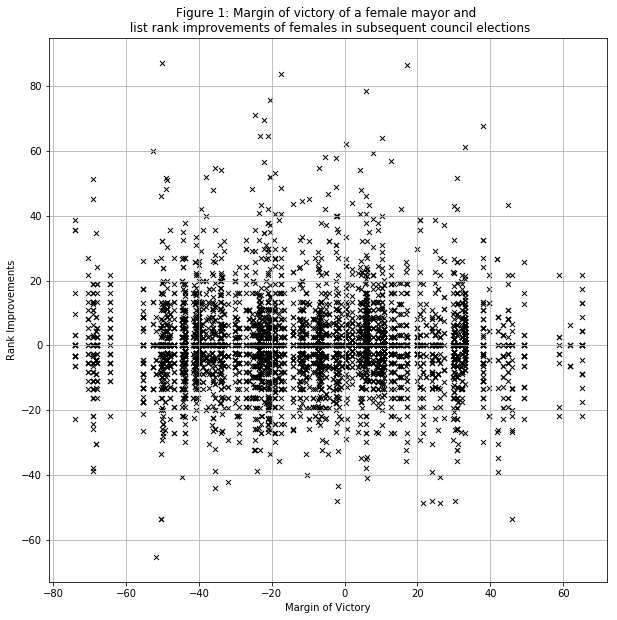

In [3]:
# Create a dataset that only contains observations on (a) mixed gender mayor elections and 
# (b) on rank improvements of female council candidates.
rdd_data = df_main_dataset.loc[(df_main_dataset.female == 1) & (df_main_dataset.rdd_sample == 1)]

#### TODO: Move the number of observation stuff into a seperate block after discussing fig 1.
# Get the number of observations of mixed gender mayor elections.
#N = len(rdd_data.loc[rdd_data[['gkz', 'jahr']].drop_duplicates().index])
#print('The number of observations on mixed gender mayor elections is N={}'.format(N))

####TODO: This plot creation can be done using an auxiliary function for better readability of this notebook. 
# Create a scatter plot that shows all combinations of the margin of victory of a female 
# in a mixed gender mayor lection and the rank improvements of female candidates in subsequent council elections.
plt.figure(figsize=(10,10))
plt.scatter(x=rdd_data['margin_1'], y=rdd_data['gewinn_norm'], marker = 'x', s=25, color='k', linewidth=1)
plt.title(label='Figure 1: Margin of victory of a female mayor and \n list rank improvements of females in subsequent council elections')
plt.xlabel('Margin of Victory')
plt.ylabel('Rank Improvements')
plt.grid()
plt.show()

Figure 1 displayes all available combinations of the rank improvement of a female council candidate and the margin of victory od a female mayor a preceeding mixed gender election. Looking at the distributions of observed combinations, a pattern of *horizontally as well as vertically aligned datapoints* is revealed. First, since the authors work with a dataset that contains the rank improvements of each female council candidate for a given result for the preceeding mayoral election, discrete changes in the horizontal dimension are to be expected. 

Second, the discrete distributionof values in the vertical dimension (along the ordinate) can be explained when a closer look is taken at the distribution of council sizes: As previously described, rank improvements are normalized using the respective size of the council. While the authors do not provide data on the council sizes, this value can easily be deduced from the given values for absolute and relative gains in list ranks for the candidates. As presented in figure 2, sizes of the 214 observed councils are distributed over relatively few values and are clustered at certain values. In addition, 95 % if all councils have not more than 45 seats. It, thus, seems plausible to observe a discrete distribution of normalized rank improvements, given the discussed distibution of council sizes which will cause the denominator for the value on the ordinate to be the same for a large number of observations.


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

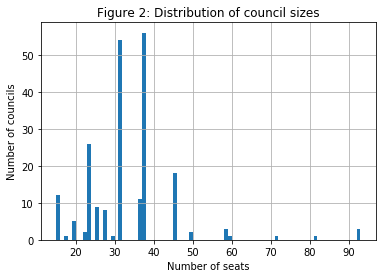

The number of council elections that we have observations for is 214. 
 The 95 % percentile of council sizes is 45.


In [4]:
## Find the reason for the discrete changes in gewinn_norm. 
# This would make sense, if the council sizes are small and many councils have same sizes. 

# Deduce the councile size using previously introduced conversion to normalizesd rank improvements. 
council_sizes = rdd_data[['gkz_jahr', 'gewinn_norm', 'gewinn', 'listenplatz_norm']]
council_sizes.loc[:,'council_size'] = council_sizes.loc[:,'gewinn'] / council_sizes.loc[:,'gewinn_norm'] *100

# drop rows where gewinn = 0 since we cannot deduct on council sizes in these cases. 
council_sizes.drop(labels=council_sizes.loc[council_sizes.loc[:, 'gewinn']==0,:].index, axis=0, inplace=True)

# Calculate the 95% percentile of council sizes as well as the number of councils that were voted for. 
N_councils = len(council_sizes.drop_duplicates(subset=['gkz_jahr'])['council_size'])
percentile = int(np.percentile(a=council_sizes.drop_duplicates(subset=['gkz_jahr'])['council_size'], q=95, interpolation='lower'))


# plot a histogram for the council sizes
bins = ((council_sizes['council_size']).max() - (council_sizes['council_size']).min())
bins = int(bins)

plt.hist(council_sizes.drop_duplicates(subset=['gkz_jahr'])['council_size'], bins=bins)
plt.title(label='Figure 2: Distribution of council sizes')
plt.xlabel('Number of seats')
plt.ylabel('Number of councils')
plt.grid()
plt.show()

print('The number of council elections that we have observations for is {}. \n The 95 % percentile of council sizes is {}.'.format(N_councils, percentile))

## 3. Replication and Critical Review
### 3.1 RDD Plot
A clear discontinuity around the cutoff value of the margin of victory of 0, however, is hard - if at all - to spot in figure 1 presented above. This might be due to the very noisy representation caused by plotting every single observation. Hence, a more promising approach is presented by the authors in *Figure 2. Rank Improvement of Female Candidates* of the article: A RDD-plot for binned normalized rank improvements. A replication of this RDD-plot is displayed in figure 3 below.

In this plot, first, the running variable (female mayor candidate margin of victory) is limited o values from -30 to +30 %. This allows to focus on the part of the data which is most relevant for this analysis. Second, the authors decide to bin the observations into clusters of 3 percentage points width of the running variable. Third, local linear smoothing of the binned observations is added (red line) indicating the relation of both variables.



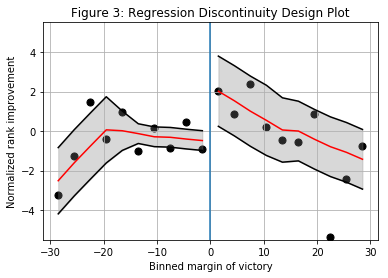

In [15]:
# Keep only observations that fir above described criteria
rdd_data = rdd_data.loc[(rdd_data.margin_1 >= -30) & (rdd_data.margin_1 <= 30)]

# Create the RDD plot using the function stored in the auxiliary file. 
rdd_plot(data=rdd_data, x_variable="margin_1", y_variable="gewinn_norm", ylimits=(-5.5,5.5), frac=0.7)

In [ ]:
obs=[5, 32, 12, 76, 7, 3, 6, 1]
frac = 0.5

def standard_deviations(obs, frac)
    """ Calculates local standard deviations. For each observation the standard deviation of its 
    k-nearest neighbors is calculated.
    
    Args:
        frac: gives the share of observations that should be included in the neighborhood around each value.
        obs: contains the array of observations for which the local standard deviations should be returned.
        
    Returns:
        std: An array with the local standard deviation for each observation.
        
    """
    
    # calculate the number of neighboring observations that are used in each local estimation, floor if its a float
    n = len(obs)
    k = int(frac * n)
    std = np.zeros(n)

    # define borders for k 
    if k <= 1:
        k = 1
    if k >= n:
        k = n

    # While there is too few values on the left, consider first k elements.
    i=0

    while i - np.floor(k/2) < 0:
        left_border, right_border = 0, k
        neighborhood = obs[left_border:right_border+1]
        std[i] = np.std(neighborhood)
        i+=1

    # Each i's neighborhood is centered around i. For odd k, i is left from the center.
    while (i - np.floor(k/2) >= 0) & (i + np.ceil(k/2) < n-1):
        left_border = int(i-np.floor(k/2))
        right_border = int(i+np.ceil(k/2))
        neighborhood = obs[left_border:right_border+1]
        std[i] = np.std(neighborhood)
        i+=1


    # While there is too few values on the right, consider last k elements
    while (i + np.ceil(k/2) >= n-1) & (i<=n-1):
        left_border, right_border = n-k-1, n-1
        neighborhood = obs[left_border:right_border+1]
        std[i] = np.std(neighborhood)
        i+=1
    
    return std

In [ ]:
print(np.ceil(k/2))